# Importing Libraries

In [1]:
import warnings


warnings.filterwarnings('ignore')

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, LSTM, GRU, MaxPool1D, SimpleRNN, Flatten, Dropout, Conv1D

ModuleNotFoundError: No module named 'imblearn'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

TypeError: __init__() got an unexpected keyword argument 'serialized_options'

# Importing Dataset

In [7]:
data = pd.read_csv("ALLFLOWMETER_HIKARI2021.csv")

# EDA

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                555278 non-null  int64  
 1   Unnamed: 0.1              555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [9]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,137369.392132,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095724,99946.804651,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,52201.000000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,121610.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,211889.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,350709.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


In [8]:
data.isnull().sum()

Unnamed: 0              0
Unnamed: 0.1            0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

# Data Visualization

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_category'], bins=20)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 720x432 with 0 Axes>

[]

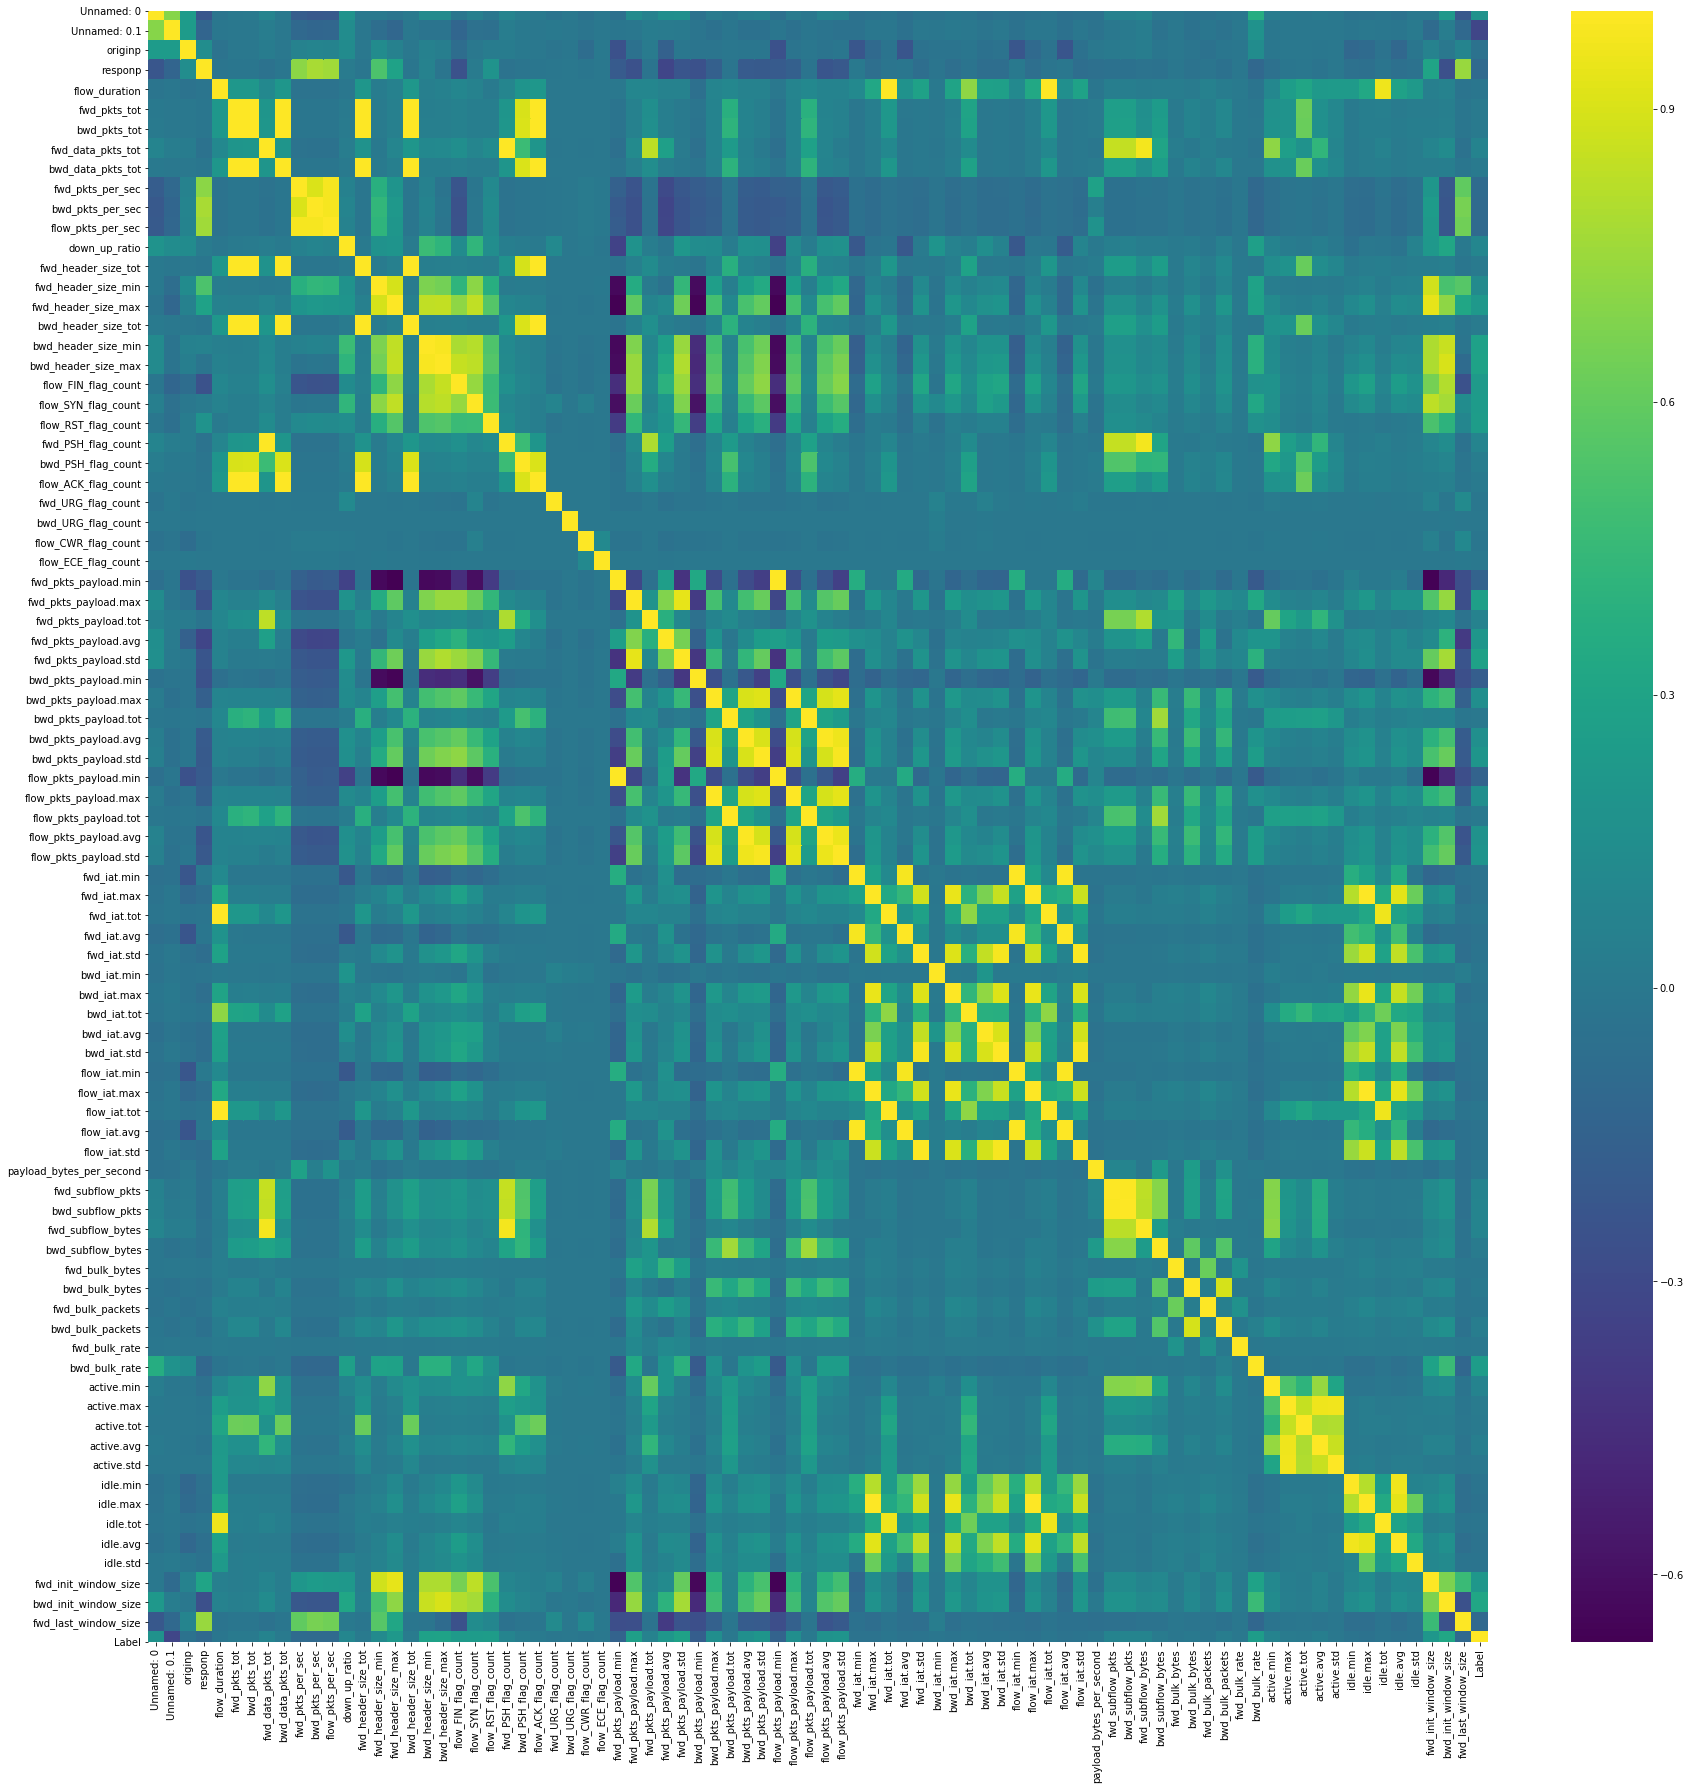

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.plot()

# Model Building

In [11]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'uid'], axis = 1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   originh                   555278 non-null  object 
 1   originp                   555278 non-null  int64  
 2   responh                   555278 non-null  object 
 3   responp                   555278 non-null  int64  
 4   flow_duration             555278 non-null  float64
 5   fwd_pkts_tot              555278 non-null  int64  
 6   bwd_pkts_tot              555278 non-null  int64  
 7   fwd_data_pkts_tot         555278 non-null  int64  
 8   bwd_data_pkts_tot         555278 non-null  int64  
 9   fwd_pkts_per_sec          555278 non-null  float64
 10  bwd_pkts_per_sec          555278 non-null  float64
 11  flow_pkts_per_sec         555278 non-null  float64
 12  down_up_ratio             555278 non-null  float64
 13  fwd_header_size_tot       555278 non-null  i

In [13]:
category_mapping = {
    'Bruteforce-XML': 1,
    'Bruteforce': 2,
    'Background': 3,
    'Benign': 4,
    'Probing': 5,
    'XMRIGCC CryptoMiner': 6
}


data['traffic_category'] = data['traffic_category'].map(category_mapping)

# Feature Selection

In [14]:
label_encoder = LabelEncoder()

data["originh"] = label_encoder.fit_transform(data["originh"])
data["responh"] = label_encoder.fit_transform(data["responh"])

In [2]:
correlation = data.corr()['Label'].abs().sort_values(ascending=False)

NameError: name 'data' is not defined

In [1]:
x = correlation.index[1:10]
X = data[x]
y = data['Label']

NameError: name 'correlation' is not defined

In [17]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Linear Regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [19]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision = precision_score(y_test, y_pred_binary) * 100
recall = recall_score(y_test, y_pred_binary) * 100
f1 = f1_score(y_test, y_pred_binary) * 100
accuracy = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity = true_negative / (true_negative + false_positive) * 100
sensitivity = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Precision: 80.87601984263986
Recall: 86.02172358477803
F1 Score: 83.36954689343847
Accuracy: 82.84621292257755
Specificity: 79.67281822483608
Sensitivity: 86.02172358477803


# Naive Bayes

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [21]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision1 = precision_score(y_test, y_pred_binary) * 100
recall1 = recall_score(y_test, y_pred_binary) * 100
f11 = f1_score(y_test, y_pred_binary) * 100
accuracy1 = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity1 = true_negative / (true_negative + false_positive) * 100
sensitivity1 = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)
print("Accuracy:", accuracy1)
print("Specificity:", specificity1)
print("Sensitivity:", sensitivity1)

Precision: 76.48572445320413
Recall: 81.00249318722096
F1 Score: 78.67933826117564
Accuracy: 78.05712132848387
Specificity: 75.11371208390068
Sensitivity: 81.00249318722096


# Xgboost

In [22]:
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

In [23]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision2 = precision_score(y_test, y_pred_binary) * 100
recall2 = recall_score(y_test, y_pred_binary) * 100
f12 = f1_score(y_test, y_pred_binary) * 100
accuracy2 = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity2 = true_negative / (true_negative + false_positive) * 100
sensitivity2 = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)
print("Accuracy:", accuracy2)
print("Specificity:", specificity2)
print("Sensitivity:", sensitivity2)

Precision: 89.02033658753632
Recall: 98.60265553429582
F1 Score: 93.56680100686373
Accuracy: 93.22281955050644
Specificity: 87.84656835762088
Sensitivity: 98.60265553429582


# Proposed Algorithm

In [24]:
X = X.values  
X = np.expand_dims(X, axis=-1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [26]:
model = Sequential()

model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))


model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 64)             6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [27]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_pred_classes = y_pred_classes.ravel()

a3 = accuracy_score(y_test, y_pred_classes) * 100
p3 = precision_score(y_test, y_pred_classes, average='macro') * 100
r3 = recall_score(y_test, y_pred_classes, average='macro') * 100
f3 = f1_score(y_test, y_pred_classes, average='macro') * 100

conf_matrix_gru = confusion_matrix(y_test, y_pred_classes)

TN = conf_matrix_gru[0, 0]
FP = conf_matrix_gru[0, 1]
FN = conf_matrix_gru[1, 0]
TP = conf_matrix_gru[1, 1]

sensitivity3 = TP / (TP + FN) * 100
specificity3 = TN / (TN + FP) * 100


# Comparison

In [28]:
results ={'Accuracy': [accuracy,accuracy1,accuracy2,a3],
 'Recall':[recall,recall1,recall2,r3],
 'Precision': [precision,precision1,precision2,p3],
  'F1 Score' : [f1,f11,f12,f3],
  'Sensitivity' : [sensitivity,sensitivity1,sensitivity2,sensitivity3],
  'Specificity' : [specificity,specificity1,specificity2,specificity3]}
index = ['Linear Regression','Naive Bayes','Xgboost','Proposed System']

In [29]:
results =pd.DataFrame(results,index=index)

In [30]:
print(results)

                    Accuracy     Recall  Precision   F1 Score  Sensitivity  \
Linear Regression  82.846213  86.021724  80.876020  83.369547    86.021724   
Naive Bayes        78.057121  81.002493  76.485724  78.679338    81.002493   
Xgboost            93.222820  98.602656  89.020337  93.566801    98.602656   
Proposed System    50.016664  50.000000  25.008332  33.340739     0.000000   

                   Specificity  
Linear Regression    79.672818  
Naive Bayes          75.113712  
Xgboost              87.846568  
Proposed System     100.000000  


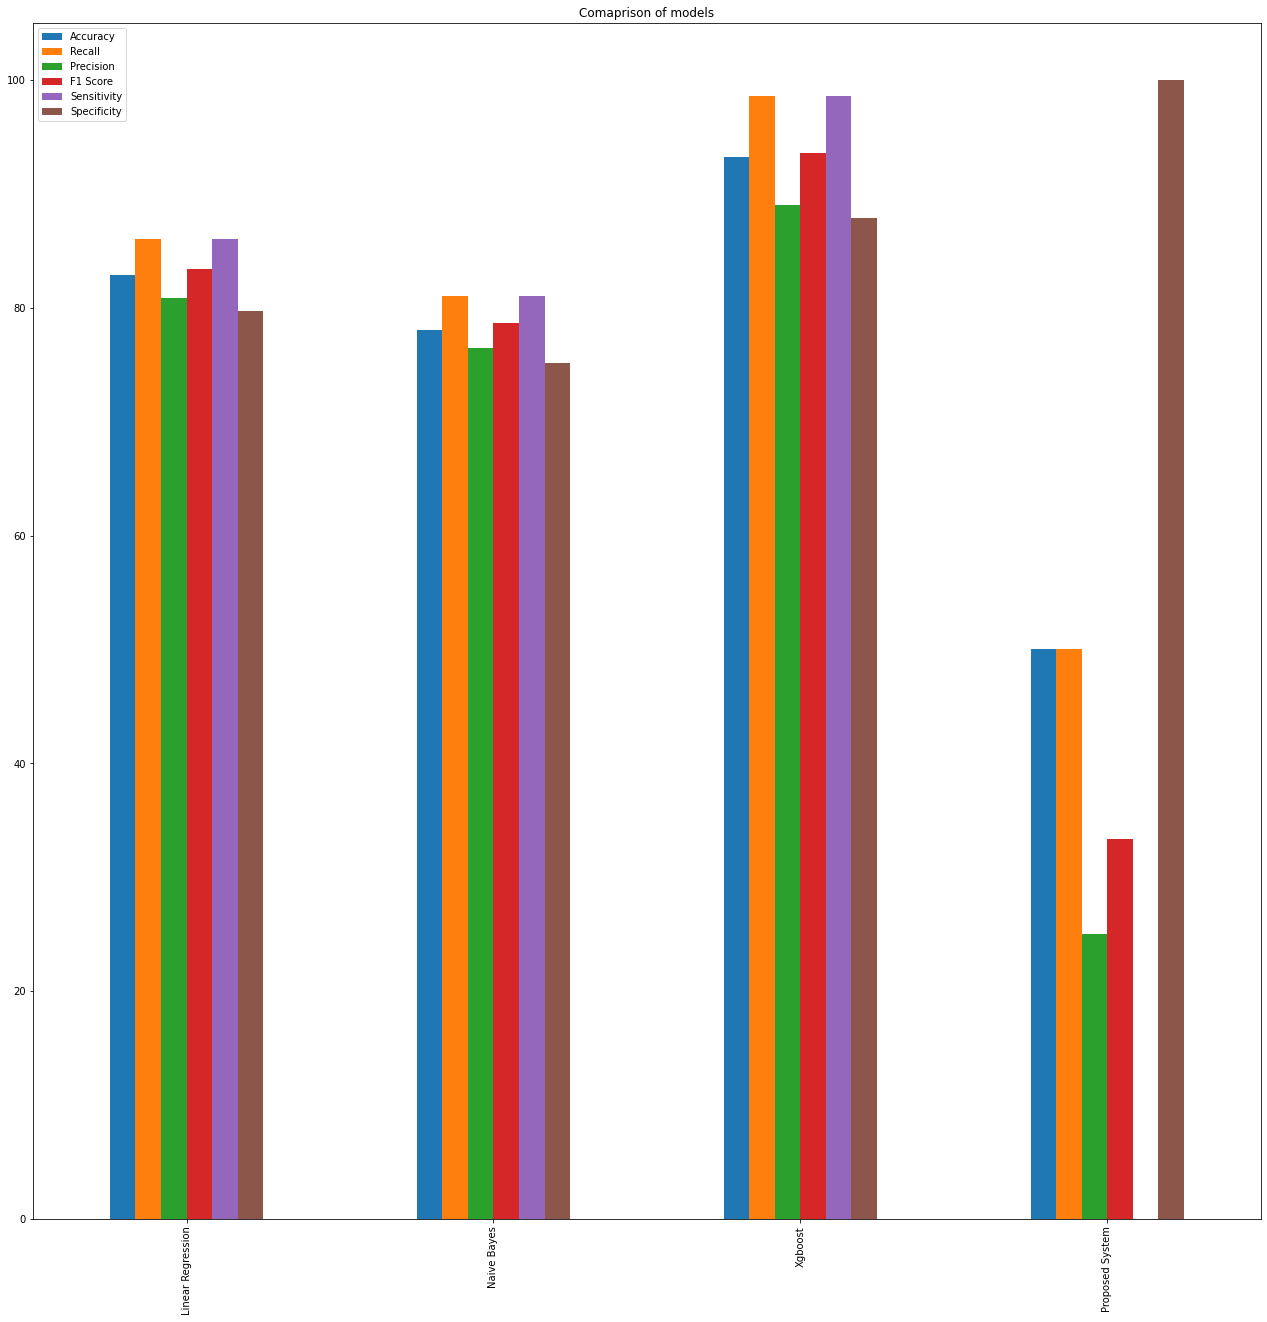

In [31]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(22,22)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>,
       <AxesSubplot:title={'center':'F1 Score'}>,
       <AxesSubplot:title={'center':'Sensitivity'}>,
       <AxesSubplot:title={'center':'Specificity'}>], dtype=object)

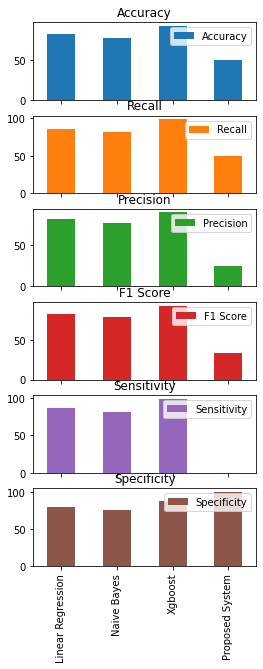

In [32]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

# Saving the model

In [33]:
pickle.dump(xg,open('model.sav','wb'))